### Import neccessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Task 1: Data Exploration & Cleaning

## Data Loading and Exploration

First the dataset is loaded into a Pandas Dataframe object

In [ ]:
df = pd.read_csv("dataset.csv")

Let's check the columns of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            20000 non-null  int64 
 1   install_date       20000 non-null  object
 2   last_active_date   20000 non-null  object
 3   subscription_type  20000 non-null  object
 4   country            20000 non-null  object
 5   total_sessions     20000 non-null  int64 
 6   page_views         20000 non-null  int64 
 7   download_clicks    20000 non-null  int64 
 8   activation_status  20000 non-null  int64 
 9   days_active        20000 non-null  int64 
 10  pro_upgrade_date   4029 non-null   object
 11  plan_type          4029 non-null   object
 12  monthly_revenue    20000 non-null  int64 
 13  churned            20000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.1+ MB


In [ ]:
df.head()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,NaN,NaN,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,NaN,NaN,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,NaN,NaN,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,NaN,NaN,0,0


In [ ]:
df.tail()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
19995,19996,5/6/2023,9/29/2023,Free,USA,100,300,0,1,146,NaN,NaN,0,0
19996,19997,9/4/2023,9/21/2023,Pro,Germany,93,372,0,1,17,9/21/2023,Basic,49,1
19997,19998,4/1/2023,6/14/2023,Free,India,37,185,0,1,74,NaN,NaN,0,0
19998,19999,1/28/2023,12/26/2023,Pro,Australia,99,198,0,1,332,12/26/2023,Enterprise,29,0
19999,20000,12/31/2023,1/1/2024,Free,Canada,141,282,0,1,1,NaN,NaN,0,1


Let's check if there is any duplicate user in the dataset. As the number of unique user id is equal to the length of the dataset, it can be concluded that there is no duplicate user.

In [ ]:
len(df['user_id'].unique())

20000

Now, we convert the date columns to Pandas datetime object

In [ ]:
df['install_date'] = pd.to_datetime(df['install_date'], format= '%m/%d/%Y')
df['last_active_date'] = pd.to_datetime(df['last_active_date'], format= '%m/%d/%Y')
df['pro_upgrade_date'] = pd.to_datetime(df['pro_upgrade_date'], format= '%m/%d/%Y')

df.head()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,2023-06-29,2023-07-12,Free,UK,3,15,1,1,13,NaT,NaN,0,1
1,2,2023-04-10,2023-07-25,Free,India,133,665,0,1,106,NaT,NaN,0,0
2,3,2023-10-25,2023-12-07,Free,USA,53,106,0,1,43,NaT,NaN,0,0
3,4,2023-08-26,2023-11-09,Pro,Canada,242,242,0,1,75,2023-11-09,Basic,49,0
4,5,2023-05-14,2023-11-22,Free,UK,12,48,0,1,192,NaT,NaN,0,0


Check if there are rows with free users having values in `pro_upgrade_date` or `plan_type` cloumns. The ouput table should have zero rows.

In [ ]:
df[(df['subscription_type'] == 'Free') & (~(df['pro_upgrade_date'].isna()) | ~(df['plan_type'].isna()))]

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned


Check for consistency among date columns

In [ ]:
df[(df['install_date'] <= df['pro_upgrade_date']) & (df['pro_upgrade_date'] <= df['last_active_date'])]

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
3,4,2023-08-26,2023-11-09,Pro,Canada,242,242,0,1,75,2023-11-09,Basic,49,0
14,15,2023-02-22,2023-09-14,Pro,USA,89,356,0,1,204,2023-09-14,Standard,99,0
15,16,2023-05-08,2023-09-27,Pro,USA,175,525,0,1,142,2023-09-27,Standard,49,0
18,19,2023-03-02,2023-10-23,Pro,USA,22,66,0,1,235,2023-10-23,Standard,99,0
25,26,2023-07-13,2023-10-02,Pro,USA,61,183,0,1,81,2023-10-02,Basic,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,19977,2023-05-28,2023-07-27,Pro,India,210,840,0,1,60,2023-07-27,Basic,29,0
19977,19978,2023-10-26,2023-12-21,Pro,UK,90,450,0,1,56,2023-12-21,Standard,29,0
19987,19988,2023-02-10,2023-03-01,Pro,UK,136,272,0,1,19,2023-03-01,Enterprise,29,1
19996,19997,2023-09-04,2023-09-21,Pro,Germany,93,372,0,1,17,2023-09-21,Basic,49,1


In [ ]:
df[df['install_date'] <= df['last_active_date']]

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,2023-06-29,2023-07-12,Free,UK,3,15,1,1,13,NaT,NaN,0,1
1,2,2023-04-10,2023-07-25,Free,India,133,665,0,1,106,NaT,NaN,0,0
2,3,2023-10-25,2023-12-07,Free,USA,53,106,0,1,43,NaT,NaN,0,0
3,4,2023-08-26,2023-11-09,Pro,Canada,242,242,0,1,75,2023-11-09,Basic,49,0
4,5,2023-05-14,2023-11-22,Free,UK,12,48,0,1,192,NaT,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2023-05-06,2023-09-29,Free,USA,100,300,0,1,146,NaT,NaN,0,0
19996,19997,2023-09-04,2023-09-21,Pro,Germany,93,372,0,1,17,2023-09-21,Basic,49,1
19997,19998,2023-04-01,2023-06-14,Free,India,37,185,0,1,74,NaT,NaN,0,0
19998,19999,2023-01-28,2023-12-26,Pro,Australia,99,198,0,1,332,2023-12-26,Enterprise,29,0


## Missing Value Handling

In [ ]:
df.isna().sum()

,0
user_id,0
install_date,0
last_active_date,0
subscription_type,0
country,0
total_sessions,0
page_views,0
download_clicks,0
activation_status,0
days_active,0


We see that there are two columns having missing value. It is expected as these two columns are applicable for Pro users only. So, for all Free users these columns do not contain any value. For now, we will keep these columns as it is.

## Summary of the dataset

In [ ]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
user_id,20000.0,10000.5,1.0,5000.75,10000.5,15000.25,20000.0,5773.647028
install_date,20000,2023-07-02 13:47:03.839999744,2023-01-01 00:00:00,2023-04-02 00:00:00,2023-07-02 00:00:00,2023-10-02 00:00:00,2024-01-01 00:00:00,NaN
last_active_date,20000,2023-10-01 20:31:24.960000,2023-01-03 00:00:00,2023-08-14 00:00:00,2023-10-25 00:00:00,2023-12-08 00:00:00,2024-01-01 00:00:00,NaN
total_sessions,20000.0,91.9145,1.0,44.0,85.0,126.0,300.0,62.523862
page_views,20000.0,276.3089,1.0,96.0,208.0,396.0,1500.0,244.775351
download_clicks,20000.0,0.10225,0.0,0.0,0.0,0.0,1.0,0.302984
activation_status,20000.0,0.99055,0.0,1.0,1.0,1.0,1.0,0.096753
days_active,20000.0,91.2808,0.0,24.0,68.0,140.0,364.0,80.67644
pro_upgrade_date,4029,2023-10-02 04:25:54.728220160,2023-01-08 00:00:00,2023-08-15 00:00:00,2023-10-27 00:00:00,2023-12-09 00:00:00,2024-01-01 00:00:00,NaN
monthly_revenue,20000.0,11.77405,0.0,0.0,0.0,0.0,99.0,26.845358


Chack the available categories for the categorical columns.

In [ ]:
categorical_columns = ['subscription_type', 'country', 'download_clicks', 'activation_status', 'plan_type', 'churned']
for col in categorical_columns:
  print(df[col].unique())

['Free' 'Pro']
['UK' 'India' 'USA' 'Canada' 'Germany' 'Australia' 'France']
[1 0]
[1 0]
[nan 'Basic' 'Standard' 'Enterprise']
[1 0]


## Distribution of Free vs. Pro users

<ipython-input-33-c3a62d3ba5d1>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.text(i, v/2, f"{subscription_percentages[i]:.1f}%", ha='center', color='white', fontweight='bold')


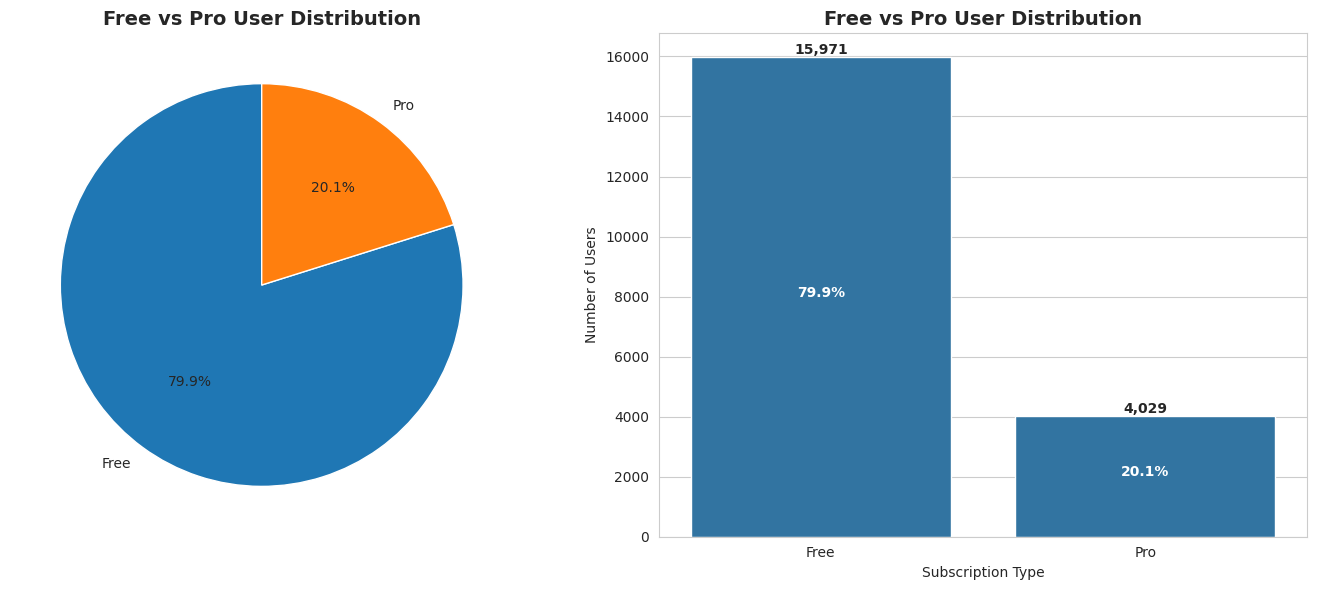

In [ ]:
subscription_counts = df['subscription_type'].value_counts()
subscription_percentages = df['subscription_type'].value_counts(normalize=True) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.pie(subscription_counts, labels=subscription_counts.index,
        autopct='%1.1f%%', startangle=90)
ax1.set_title('Free vs Pro User Distribution', fontsize=14, fontweight='bold')

sns.barplot(x=subscription_counts.index, y=subscription_counts.values, ax=ax2)
ax2.set_title('Free vs Pro User Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Subscription Type')
ax2.set_ylabel('Number of Users')

for i, v in enumerate(subscription_counts.values):
    ax2.text(i, v + 100, f"{v:,}", ha='center', fontweight='bold')
    ax2.text(i, v/2, f"{subscription_percentages[i]:.1f}%", ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

### Distribution of Pro vs Free users by country

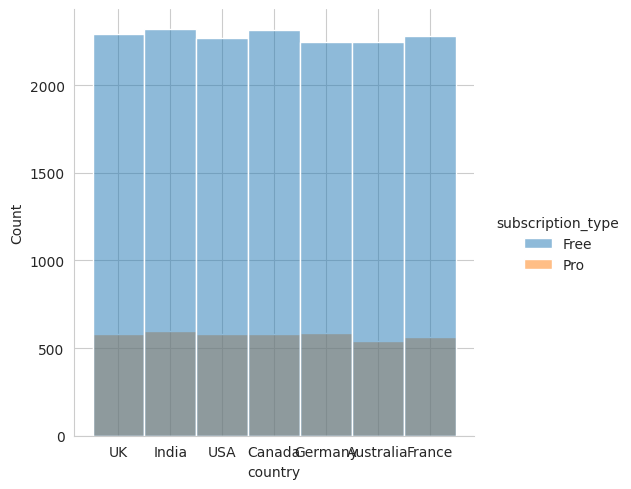

In [ ]:
sns.displot(data=df, x='country', hue="subscription_type", kind="hist")

# Task 2: User Engagement Analysis

## Identification the average number of sessions for Free vs. Pro users

In [ ]:
df.groupby('subscription_type')['total_sessions'].mean()

,total_sessions
subscription_type,
Free,76.081210
Pro,154.677836


## Top 5 most active users based on total sessions

In [ ]:
df.sort_values(['total_sessions'], ascending=False).head(5)

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
15351,15352,2023-09-23,2023-10-09,Pro,Germany,300,900,0,1,16,2023-10-09,Basic,99,1
3965,3966,2023-02-07,2023-12-15,Pro,France,300,1500,0,1,311,2023-12-15,Basic,99,0
12849,12850,2023-07-25,2023-12-26,Pro,India,300,600,1,1,154,2023-12-26,Standard,99,0
12191,12192,2023-03-27,2023-07-15,Pro,UK,300,1500,0,1,110,2023-07-15,Basic,29,0
2456,2457,2023-10-16,2023-12-26,Pro,Germany,300,300,0,1,71,2023-12-26,Enterprise,29,0


##  Top 5 countries with the highest engagement

In [ ]:
df.groupby('country')['total_sessions'].sum().sort_values( ascending=False).head(5)

,total_sessions
country,
India,272202
Germany,266319
Canada,264217
USA,261635
France,259495


# Task 3: Churn Analysis

## Calculate the overall churn rate for Free vs. Pro users

In [ ]:
free_churn_rate = df[df['subscription_type'] == 'Free']['churned'].mean() * 100
pro_churn_rate = df[df['subscription_type'] == 'Pro']['churned'].mean() * 100

print(f"Free user churn rate: {free_churn_rate:.2f}%")
print(f"Pro user churn rate: {pro_churn_rate:.2f}%")

Free user churn rate: 28.60%
Pro user churn rate: 28.25%


## Top 3 factors contributing to churn using regression analysis

In [ ]:
X = df.drop(['churned', 'install_date', 'last_active_date', 'pro_upgrade_date'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['churned']

numerical_features = ['total_sessions', 'page_views', 'days_active', 'monthly_revenue']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])
X.drop(numerical_features, axis=1, inplace=True)
X = pd.concat([X, pd.DataFrame(X_scaled, columns=numerical_features)], axis=1)

model = LogisticRegression(max_iter=10000)
model.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)

                  Feature    Importance
14            days_active  2.658121e+01
6         country_Germany  2.010452e-01
5          country_France  1.910983e-01
4          country_Canada  1.492022e-01
9             country_USA  1.170882e-01
8              country_UK  1.094990e-01
11     plan_type_Standard  7.749552e-02
2       activation_status  6.433517e-02
10   plan_type_Enterprise  6.392503e-02
3   subscription_type_Pro  5.070238e-02
7           country_India  3.154133e-02
1         download_clicks  1.623068e-02
12         total_sessions  1.096005e-02
15        monthly_revenue  7.679568e-03
13             page_views  1.853107e-03
0                 user_id  3.235464e-07


Here, we can see that the top 3 factors contributing to churn are:
1.   days_active
2.   Whether the user is from Germany
3.   Whether the user is from France

## Comparison of churn trends between Free and Pro users

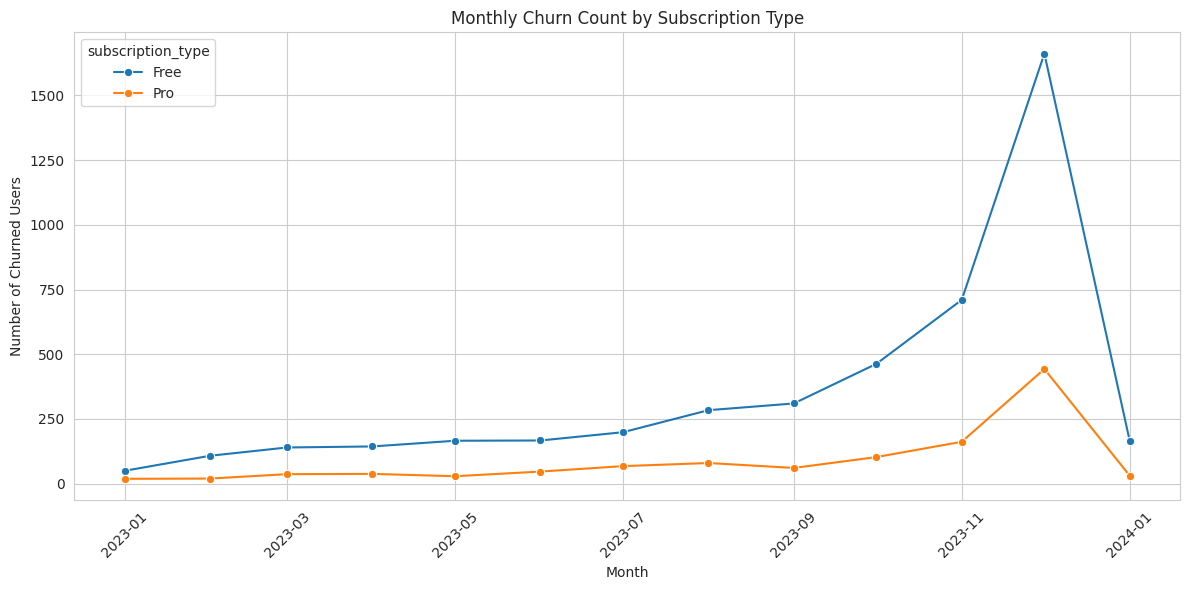

In [ ]:
df['churn_month'] = df['last_active_date'].dt.to_period('M')

df_churned = df[df['churned'] == 1]

monthly_churn = df_churned.groupby(['churn_month', 'subscription_type']).size().reset_index(name='churn_count')
monthly_churn['churn_month'] = monthly_churn['churn_month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_churn, x='churn_month', y='churn_count', hue='subscription_type', marker='o')

plt.title("Monthly Churn Count by Subscription Type")
plt.xlabel("Month")
plt.ylabel("Number of Churned Users")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task 4: Revenue & Upgrade Trends

## percentage of users upgraded from Free to Pro

In [ ]:
len(df[df['subscription_type'] == 'Pro']) / len(df) * 100

20.145

## total monthly revenue from Pro users

In [ ]:
df[df['subscription_type'] == 'Pro']['monthly_revenue'].sum()

235481

## Which Pro plan (Basic, Standard, or Enterprise) contributes the most revenue?

In [ ]:
df.groupby('plan_type')['monthly_revenue'].sum()

,monthly_revenue
plan_type,
Basic,80339
Enterprise,78764
Standard,76378


##  how long it takes for Free users to upgrade based on country and engagement level

<ipython-input-62-642c1b89fc06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upgraded_users['days_to_upgrade'] = (pd.to_datetime(upgraded_users['pro_upgrade_date']) -
<ipython-input-62-642c1b89fc06>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upgraded_users['engagement_level'] = pd.qcut(
<ipython-input-62-642c1b89fc06>:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning an

engagement_level   Low  Medium  High
country                             
Australia         69.0    67.0  68.0
Canada            59.0    67.0  75.0
France            76.0    67.0  69.0
Germany           66.0    78.0  66.0
India             78.0    58.0  73.0
UK                63.0    61.0  63.0
USA               67.0    66.5  73.0


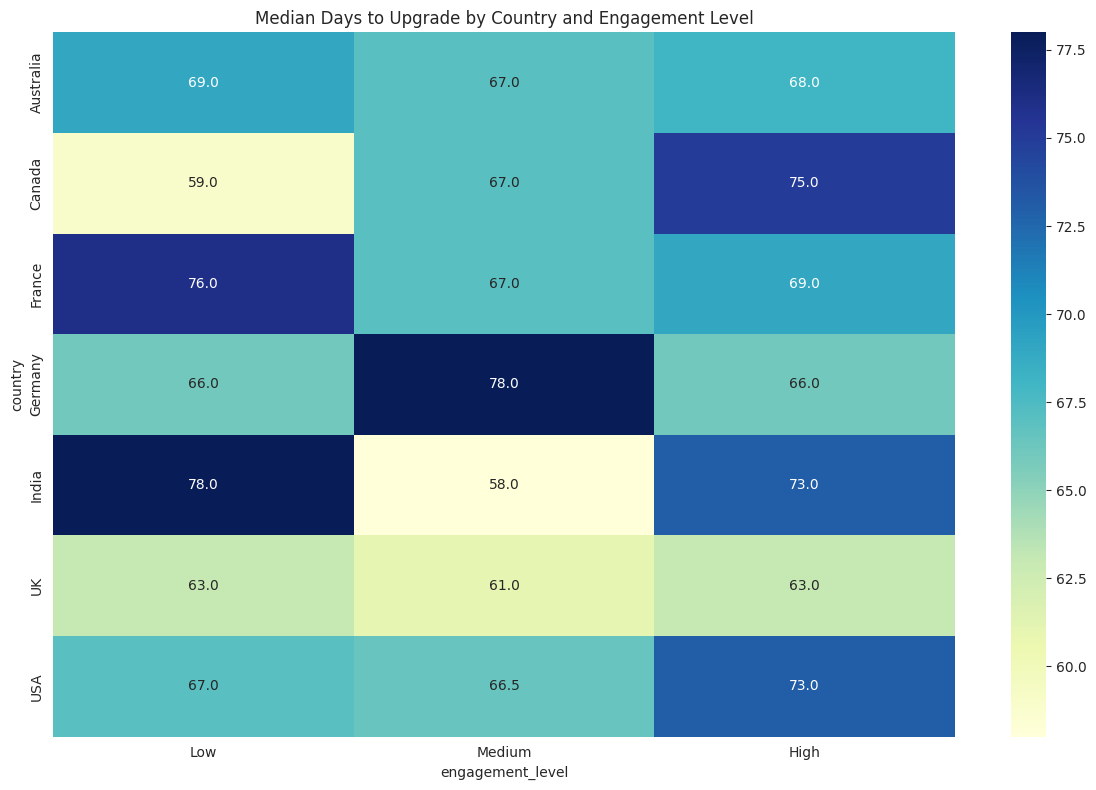

In [ ]:
upgraded_users = df[(df['subscription_type'] == 'Pro') & (~pd.isna(df['pro_upgrade_date']))]

# Calculate days to upgrade
upgraded_users['days_to_upgrade'] = (pd.to_datetime(upgraded_users['pro_upgrade_date']) -
                                    pd.to_datetime(upgraded_users['install_date'])).dt.days

# Create engagement level categories based on total_sessions
upgraded_users['engagement_level'] = pd.qcut(
    upgraded_users['total_sessions'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

# Create a pivoted table of median days to upgrade
pivot_table = upgraded_users.pivot_table(
    index='country',
    columns='engagement_level',
    values='days_to_upgrade',
    aggfunc='median'
)

print(pivot_table)

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Median Days to Upgrade by Country and Engagement Level')
plt.tight_layout()

# Task 5: Actionable Growth Recommendations

## Three strategies to reduce churn



1.   Improve user engagement
2.   Implement predictive churn models to make intervention
3.   As active_status is the most prominent contributor of churn, offer incentives such as exclusive features for being active for longer time


## Two ways to increase Free-to-Pro conversions


1.   Identify high-engagement Free users and reach out to them with personalized offers
2.   Simplifying the upgrade process, making Pro features more prominent can make users more likely to upgrade



## Potential market expansion opportunities based on country trends

In [ ]:
country_metrics = df.groupby("country").agg(
    total_users=("subscription_type", "count"),
    pro_users=("subscription_type", lambda x: (x == "Pro").sum()),
    free_users=("subscription_type", lambda x: (x == "Free").sum()),
    avg_sessions=("total_sessions", "mean"),
    avg_page_views=("page_views", "mean"),
    avg_days_active=("days_active", "mean"),
    total_revenue=("monthly_revenue", "sum"),
    churn_rate=("churned", "mean")
).reset_index()

country_metrics["conversion_rate"] = country_metrics["pro_users"] / country_metrics["total_users"]

country_metrics = country_metrics.sort_values("total_revenue", ascending=False)

overall_avg_sessions = df["total_sessions"].mean()
potential_markets = country_metrics[
    (country_metrics["free_users"] > country_metrics["pro_users"]) &
    (country_metrics["conversion_rate"] < 0.3) &
    (country_metrics["avg_sessions"] > overall_avg_sessions)
]

print("\nPotential Market Expansion Opportunities (Countries with high engagement but low conversion):")
print(potential_markets)


Potential Market Expansion Opportunities (Countries with high engagement but low conversion):
   country  total_users  pro_users  free_users  avg_sessions  avg_page_views  \
3  Germany         2832        588        2244     94.039195       283.42161   
4    India         2914        595        2319     93.411805       278.64825   

   avg_days_active  total_revenue  churn_rate  conversion_rate  
3        91.605932          34632    0.277895         0.207627  
4        92.535003          34235    0.285518         0.204187  


# Task 6: Conversion Rate Optimization (CRO)

## estimated impact on Pro upgrades


In [ ]:
total_users = len(df)
free_users = len(df[df['subscription_type'] == 'Free'])
pro_users = len(df[df['subscription_type'] == 'Pro'])
current_pro_conversion_rate = pro_users / total_users
new_user_estimate = total_users * 1.10
new_pro_estimate = new_user_estimate * current_pro_conversion_rate
additional_pro_users = new_pro_estimate - pro_users

print(f"Estimated additional Pro users: {additional_pro_users:.0f}")

Estimated additional Pro users: 403


## A simple A/B test simulation to evaluate conversion optimization

In this simulation, we randomly assign users to Group A (control) or Group B (treatment). Let's define conversion as a user clicking “Download Pro” (i.e. download_clicks = 1), and then use the chi‐square test to assess whether the difference in conversion rates is statistically significant

In [ ]:
from scipy.stats import chi2_contingency

df['variant'] = np.random.choice(['A', 'B'], size=len(df))

# Step 2: Define conversion as clicking "Download Pro" (download_clicks == 1)
df['converted'] = df['download_clicks']

# Step 3: Build the contingency table
contingency_table = pd.crosstab(df['variant'], df['converted'])
print("Contingency Table:")
print(contingency_table)

# Step 4: Run the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square Test Results:")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

alpha = 0.05
if p < alpha:
    print("\nResult: Significant difference in conversion rates between variants (p < 0.05).")
else:
    print("\nResult: No significant difference in conversion rates between variants (p >= 0.05).")

Contingency Table:
converted     0     1
variant              
A          8829   999
B          9126  1046

Chi-square Test Results:
Chi-square statistic: 0.06385807462533871
p-value: 0.8004988481095767
Degrees of freedom: 1
Expected frequencies:
[[8823.087 1004.913]
 [9131.913 1040.087]]

Result: No significant difference in conversion rates between variants (p >= 0.05).


## three A/B test ideas that could help improve the conversion rate


1.   Create country-specific landing pages that highlight features most valued by users in different regions.
2.   For Free users who show high engagement (such as top 25% in total_sessions or page_views), offer premium features for limited-time trials based on their usage patterns.
3.   Test different placements of 'Download Pro' buttons.



# Task 7: Growth Strategy & KPI Recommendations

## 3 key performance indicators (KPIs):


1.   **Net Revenue Retention (NRR)**: The percentage of revenue retained from existing customers over time, including expansions, contractions, and churn.
2.   **Free-to-Paid Conversion Rate with Time Dimension**: The percentage of free users who upgrade to paid plans within specific time intervals.
3.   **Customer Acquisition Cost (CAC) to Lifetime Value (LTV) Ratio**: The ratio between what it costs to acquire a customer and the revenue they generate over their lifetime.

## 2 actionable growth strategies


1.   **Convert Highly Engaged Free Users into Pro Subscribers**: Free users who frequently engage with the product—measured by metrics such as total_sessions, page_views, days_active, and download_clicks—demonstrate high value and are prime candidates for conversion. These users already see benefits, so targeted efforts could nudge them to upgrade.
2.   **Reduce Churn Among Pro Users Through Enhanced Retention Strategies**: Retaining existing Pro users is critical for steady revenue growth. Analyzing the churned flag along with usage metrics such as last_active_date, days_active, can help identify early warning signs of churn and address them proactively.



# Task 8: Data Storytelling & Visualization

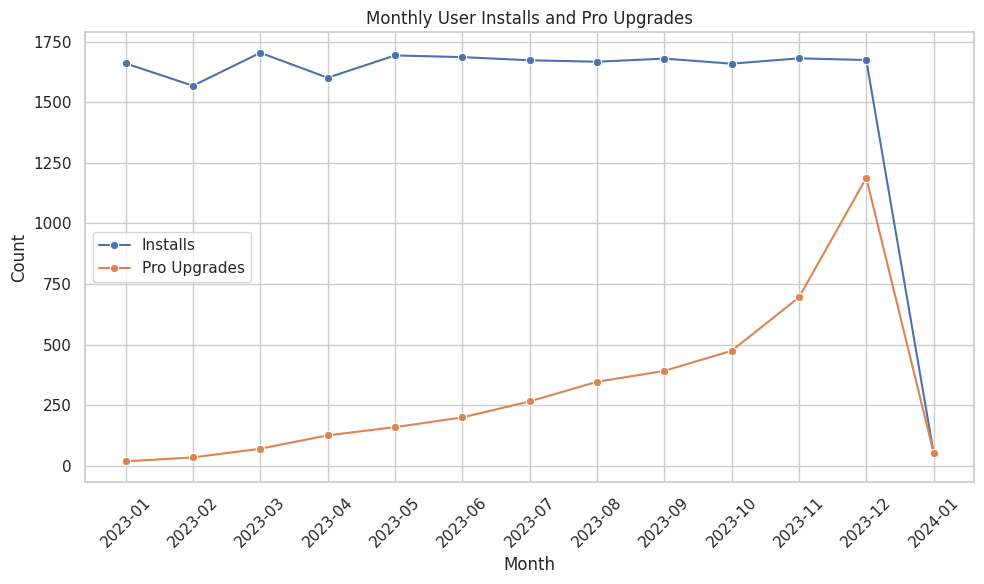

<ipython-input-79-59f746101d82>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




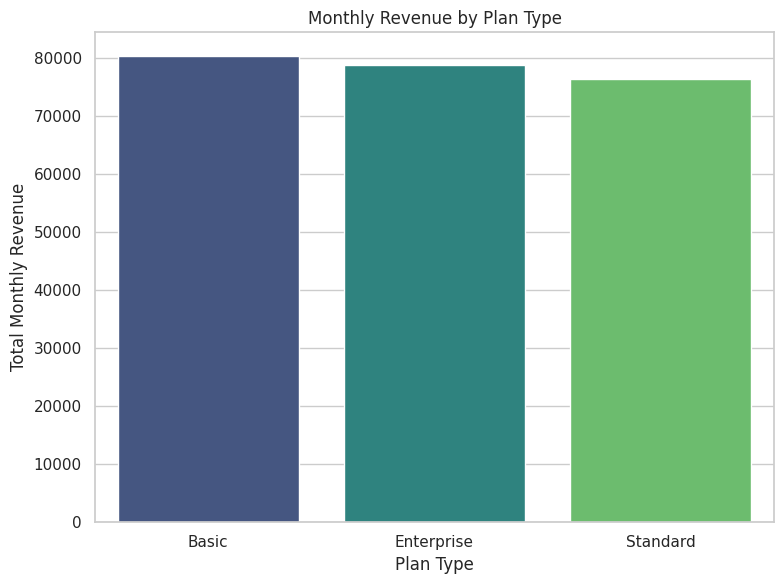

<ipython-input-79-59f746101d82>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




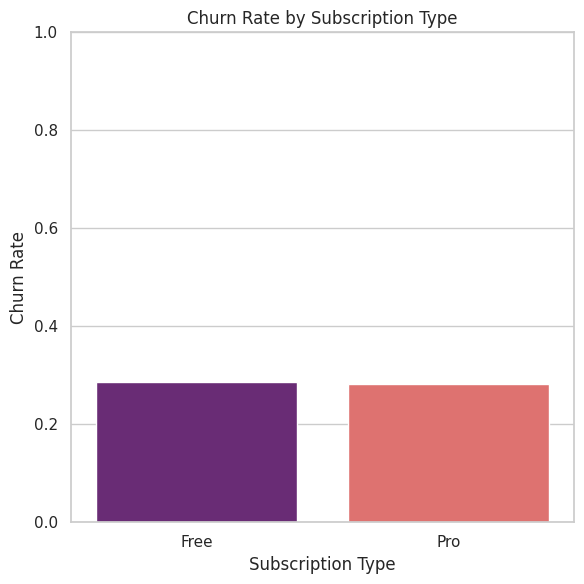

In [ ]:
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

df['install_month'] = df['install_date'].dt.to_period('M').astype(str)
installs_per_month = df.groupby('install_month').size().reset_index(name='installs')

df_upgrades = df[df['pro_upgrade_date'].notnull()].copy()
df_upgrades['upgrade_month'] = df_upgrades['pro_upgrade_date'].dt.to_period('M').astype(str)
upgrades_per_month = df_upgrades.groupby('upgrade_month').size().reset_index(name='upgrades')

monthly = pd.merge(installs_per_month, upgrades_per_month, left_on='install_month', right_on='upgrade_month', how='left')
monthly['upgrades'] = monthly['upgrades'].fillna(0)
monthly = monthly[['install_month', 'installs', 'upgrades']]

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly, x='install_month', y='installs', marker='o', label='Installs')
sns.lineplot(data=monthly, x='install_month', y='upgrades', marker='o', label='Pro Upgrades')
plt.xticks(rotation=45)
plt.title('Monthly User Installs and Pro Upgrades')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

revenue_by_plan = df[df['subscription_type'] == 'Pro'].groupby('plan_type')['monthly_revenue'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=revenue_by_plan, x='plan_type', y='monthly_revenue', palette='viridis')
plt.title('Monthly Revenue by Plan Type')
plt.xlabel('Plan Type')
plt.ylabel('Total Monthly Revenue')
plt.tight_layout()
plt.show()

churn_rate = df.groupby('subscription_type')['churned'].mean().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(data=churn_rate, x='subscription_type', y='churned', palette='magma')
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

**Monthly Trends**: The first chart helps monitor the effectiveness of your user acquisition efforts and track how well free users convert to paying customers over time.

**Revenue Analysis**: The revenue by plan type chart identifies which subscription tier is most profitable, informing potential adjustments in offerings or marketing focus.

**Churn Insights**: By comparing churn rates between Free and Pro users, you can pinpoint segments that may need better engagement strategies to improve retention.